In [1]:
import numpy as np
import pandas as pd

# Load the data
train = pd.read_csv("input/customer_churn_dataset-training-master.csv")
test = pd.read_csv("input/customer_churn_dataset-testing-master.csv")
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [2]:
# remove id and categorical features
train = train.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
train.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


In [3]:
test = test.drop(['CustomerID', 'Gender', 'Subscription Type', 'Contract Length'], axis=1)
test.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,22,25,14,4,27,598,9,1
1,41,28,28,7,13,584,20,0
2,47,27,10,2,29,757,21,0
3,35,9,12,5,17,232,18,0
4,53,58,24,9,2,533,18,0


In [4]:
# check for missing values
train.isnull().sum()

Age                 1
Tenure              1
Usage Frequency     1
Support Calls       1
Payment Delay       1
Total Spend         1
Last Interaction    1
Churn               1
dtype: int64

In [5]:
# remove missing values
train = train.dropna()
train.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [6]:
# check for missing values
test.isnull().sum()

Age                 0
Tenure              0
Usage Frequency     0
Support Calls       0
Payment Delay       0
Total Spend         0
Last Interaction    0
Churn               0
dtype: int64

In [7]:
# shuffle the training data
train = train.sample(frac=1).reset_index(drop=True)

# Remove whitespace from column names
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

train.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
0,40.0,3.0,26.0,2.0,19.0,669.63,20.0,0.0
1,58.0,8.0,28.0,9.0,7.0,883.00,20.0,1.0
2,50.0,48.0,7.0,8.0,21.0,510.00,28.0,1.0
3,50.0,34.0,25.0,2.0,5.0,600.68,1.0,0.0
4,43.0,33.0,10.0,1.0,1.0,552.37,13.0,0.0


In [8]:
# Prepare train and test data
X_train = train.drop(['Churn'], axis=1)
y_train = train['Churn']

X_test = test.drop(['Churn'], axis=1)
y_test = test['Churn']

In [9]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.05038005, -1.63750662,  1.18707561, ...,  0.7307144 ,
         0.15786273,  0.64204338],
       [ 1.49705148, -1.34774742,  1.42000665, ..., -0.7224126 ,
         1.04394074,  0.64204338],
       [ 0.8540864 ,  0.97032613, -1.02576935, ...,  0.97290223,
        -0.50504504,  1.57268738],
       ...,
       [-0.19073185,  0.15900039,  1.53647218, ..., -1.20678827,
        -0.27248953, -0.40493111],
       [-0.43184376, -0.76822903,  0.83767903, ...,  1.94165357,
        -0.09392013,  1.68901788],
       [-0.43184376, -0.18871064,  0.02242036, ...,  0.48852657,
         0.12086149,  0.75837388]])

In [10]:
# Perform PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)
X_train_pc

array([[ 0.14976568, -1.99140613],
       [ 0.92360189, -2.00695406],
       [ 2.19552939,  1.4163853 ],
       ...,
       [ 0.18051857, -0.98970877],
       [ 0.80986701, -1.11228203],
       [-0.13275165, -0.14240861]])

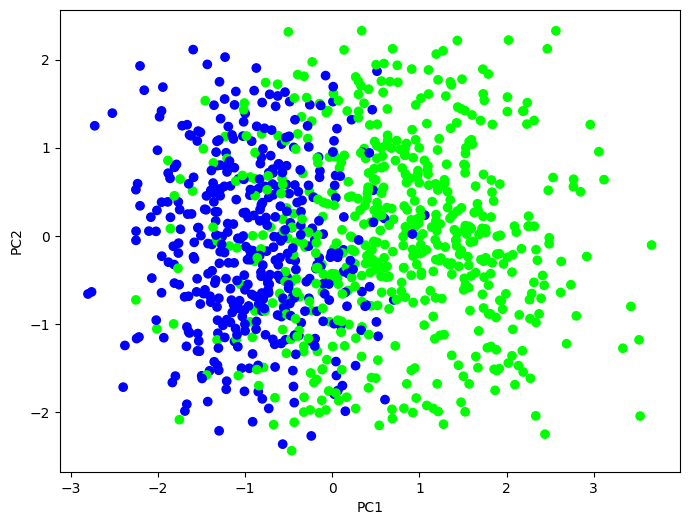

In [11]:
# Plot the data
import matplotlib.pyplot as plt

nr_samples = 1000
fig = plt.figure(figsize=(8, 6))

# 3D if n_components > 2
if pca.n_components > 2:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], X_train_pc[:nr_samples, 2],
               c=y_train[:nr_samples],
               cmap='brg')
    ax.set_zlabel('PC3')
else:
    ax = fig.add_subplot(111)
    ax.scatter(X_train_pc[:nr_samples, 0], X_train_pc[:nr_samples, 1], c=y_train[:nr_samples], cmap='brg')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

In [12]:
# Train a logistic regression model with principal components
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_pc, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_pc, y_train))
print("Test accuracy:", logreg.score(X_test_pc, y_test))

Train accuracy: 0.8287669679152149
Test accuracy: 0.5885916674433778


In [13]:
# Train a logistic regression model with all features
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Evaluate the model
print("Train accuracy:", logreg.score(X_train_scaled, y_train))
print("Test accuracy:", logreg.score(X_test_scaled, y_test))

Train accuracy: 0.8440970709930313
Test accuracy: 0.5864324106005531


In [15]:
# Do PCA using duckDB
import duckdb

con = duckdb.connect()

# Load the data from CSV
con.execute('create table churn as select * from X_train')

# Return the first 5 rows
con.execute('select * from churn limit 5').fetchdf()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction
0,40.0,3.0,26.0,2.0,19.0,669.63,20.0
1,58.0,8.0,28.0,9.0,7.0,883.00,20.0
2,50.0,48.0,7.0,8.0,21.0,510.00,28.0
3,50.0,34.0,25.0,2.0,5.0,600.68,1.0
4,43.0,33.0,10.0,1.0,1.0,552.37,13.0


In [18]:
import time

# Compute the variance for each column using duckDB
times = []
for col in X_train.columns:
    print("Computing variance for column:", col)
    query = f'select avg({col} * {col}) - avg({col}) * avg({col}) as var from churn'
    var = con.execute(query).fetchone()[0]
    print("Variance:", var)

    for i in range(1000):
        start = time.time()
        con.execute(query).fetchone()
        end = time.time()
        times.append(end - start)
print("Average time:", sum(times) / len(times))

Computing variance for column: Age
Variance: 154.8122073645793
Computing variance for column: Tenure
Variance: 297.75945213654813
Computing variance for column: Usage_Frequency
Variance: 73.72337835225596
Computing variance for column: Support_Calls
Variance: 9.426216433645134
Computing variance for column: Payment_Delay
Variance: 68.19544184549517
Computing variance for column: Total_Spend
Variance: 57985.953810840845
Computing variance for column: Last_Interaction
Variance: 73.89461890395972
Average time: 0.0004795142241886684


In [20]:
# Compute the variance for Age using pandas
times = []
for col in X_train.columns:
    print("Computing variance for column:", col)
    var = X_train[col].var()
    print("Variance:", var)

    for i in range(1000):
        start = time.time()
        X_train[col].var()
        end = time.time()
        times.append(end - start)
print("Average time:", sum(times) / len(times))

Computing variance for column: Age
Variance: 154.8125585472486
Computing variance for column: Tenure
Variance: 297.76012758689563
Computing variance for column: Usage_Frequency
Variance: 73.72354558953818
Computing variance for column: Support_Calls
Variance: 9.426237816479905
Computing variance for column: Payment_Delay
Variance: 68.19559654296846
Computing variance for column: Total_Spend
Variance: 57986.08534867255
Computing variance for column: Last_Interaction
Variance: 73.89478652969134
Average time: 0.0015805339813232421


In [32]:
from src.kronecker import massaged_svd, compute_shapes, kronecker_decomposition

# Decompose each column separately using pandas and numpy
rank = 10
krone_shapes = compute_shapes((X_train.shape[0], 1))
a_matrix = np.zeros((krone_shapes[0][0], rank * X_train.shape[1]))
b_matrix = np.zeros((krone_shapes[1][0], rank * X_train.shape[1]))
nr_cols = X_train.shape[1]

for col_idx, col_name in enumerate(X_train.columns):
    print("Decomposing column:", col_name)
    col = X_train[col_name].values
    # Compute the shapes
    col = np.atleast_2d(col).T

    # Perform the decomposition
    u, s, v = massaged_svd(col, krone_shapes[0])

    # Compute the kronecker product decomposition
    a_s, b_s = kronecker_decomposition(u, s, v, krone_shapes[0], krone_shapes[1], k=rank)

    # Store the results
    col_approx = np.zeros(col.shape)
    for r in range(rank):
        a_matrix[:, col_idx + r * nr_cols] = a_s[r][:, 0]
        b_matrix[:, col_idx + r * nr_cols] = b_s[r][:, 0]
        col_approx += np.kron(a_s[r], b_s[r])

    # Compute the error
    print("Relative RMSE: ", np.sqrt(np.mean((col - col_approx) ** 2)) / np.sqrt(np.mean(col ** 2)))

Decomposing column: Age
Relative RMSE:  0.29306563855859696
Decomposing column: Tenure
Relative RMSE:  0.47016978797370484
Decomposing column: Usage_Frequency
Relative RMSE:  0.4641776351487508
Decomposing column: Support_Calls
Relative RMSE:  0.6306286984386595
Decomposing column: Payment_Delay
Relative RMSE:  0.5224793228225559
Decomposing column: Total_Spend
Relative RMSE:  0.3465326689882155
Decomposing column: Last_Interaction
Relative RMSE:  0.4966090151613678


In [37]:
a_df = pd.DataFrame(a_matrix, columns=[f'{col_name}_{r}' for r in range(rank) for col_name in X_train.columns])
b_df = pd.DataFrame(b_matrix, columns=[f'{col_name}_{r}' for r in range(rank) for col_name in X_train.columns])

# Load the data
con.execute('create or replace table churn_a as select * from a_df')
con.execute('create or replace table churn_b as select * from b_df')

# Return the first 5 rows
con.execute('select * from churn_a limit 5').fetchdf()

,Age_0,Tenure_0,Usage_Frequency_0,Support_Calls_0,Payment_Delay_0,Total_Spend_0,Last_Interaction_0,Age_1,Tenure_1,Usage_Frequency_1,...,Payment_Delay_8,Total_Spend_8,Last_Interaction_8,Age_9,Tenure_9,Usage_Frequency_9,Support_Calls_9,Payment_Delay_9,Total_Spend_9,Last_Interaction_9
0,6.286411,5.598712,4.095891,1.911889,3.787093,24.692334,3.700244,0.172665,-0.281164,0.620011,...,0.511910,-1.804870,0.559649,0.204131,-2.111369,-1.783070,0.436525,-0.855348,1.147639,-1.751876
1,6.388276,5.561404,4.049246,1.947026,3.554423,25.141351,3.710275,-0.095228,1.256959,1.190930,...,0.231647,-1.876687,-0.229086,1.400871,2.349689,0.140123,-0.063103,-1.321100,3.903514,0.298522
2,6.190963,5.747756,3.947898,1.953724,3.712607,24.657373,3.835362,-1.244754,-2.559193,-0.123495,...,-1.126459,2.096831,-0.491324,-1.240436,-1.197029,-0.157500,0.245225,0.387077,-11.849444,-1.017300
3,6.434607,5.606744,3.961882,1.850186,3.687337,25.381291,3.876518,-0.473732,1.069979,-0.962658,...,0.063650,0.518324,1.258711,-0.072147,1.117101,1.155815,-0.090008,0.393942,-5.298671,0.905046
4,6.277290,5.585372,4.193991,1.867050,3.490099,25.767020,3.784775,0.222581,0.269107,0.049884,...,-0.827755,2.403728,1.653882,-0.552153,0.392140,0.402611,-0.495829,-0.349352,1.239714,-0.615733


In [40]:
# Compute the variance for Age using duckDB
query = 'select avg(a.Age_0 * a.Age_0) * avg(b.Age_0 * b.Age_0) - avg(a.Age_0) * avg(b.Age_0) * avg(a.Age_0) * avg(b.Age_0) as var from churn_a as a positional join churn_b as b'
var = con.execute(query).fetchone()
print("Variance:", var)

times = []
for i in range(1000):
    start = time.time()
    con.execute(query).fetchone()
    end = time.time()
    times.append(end - start)
print("Average time:", sum(times) / len(times))

Variance: (0.47492473012039227,)
Average time: 0.00018250608444213867
